# <center><b>Analysis on Car Second Hand Dataset<b></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Information**](#Section42)

**5.** [**Data Pre-Profiling**](#Section5)<br>
  - **5.1** [**Missing value**](#Section51)
  - **5.2** [**Duplicate rows**](#Section52)
  - **5.3** [**Outliers**](#Section53)

**6.** [**Data Cleaning**](#Section6)<br>
**7.** [**Data Post-Profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- Even as new car sales have slowed down in the recent past, the **pre-owned car market** has continued to grow over the past year and is larger than the new car market now.

- Experts said a slowdown in new car sales could mean the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with **pre-owned cars** instead of buying new ones.

- In the increasingly **competitive environment**, enterprises have to create a decision-making model for precision marketing on provide right value to particulat brand.

<center><img width=50% src="https://dealerimages.dealereprocess.com/image/upload/w_700/1157477.jpg"></center>

- The case study considers a **marketing problem** of find right value and good condition **pre-owned car**.

- This case study demonstrates that our **proposed decisions** and insights are capable of providing a good **precision marketing strategy**.

- The real-world data from a Car Dekho were collected and used in this case study to illustrate how to implement EDA.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- **The pre-owned car** is a market that is taking a boom year after year.
- To increase sales of good condition **pre-owned car** in market
- They track which kind of car and its market value from various brands.
- Since **2004** there is a constant hike in sales of pre-owned cars. 
- As Data Science role I have been hired to analyze their transactional data from 2004 till 2020.
- I will present an initial investigation on this data to check for various patterns and trends of selling cars.
- This would be a **leading step** to help the customer and company get the right price of cars.

---
<a name = Section3></a>
# **3. Installing and Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing & Upgrading Libraries**

In [79]:
!pip install -q datascience 
!pip install -q pandas-profiling

In [80]:
!pip install -q --upgrade pandas-profiling

In [83]:
!pip install --upgrade pandas

     |████████████████████████████████| 11.5 MB 5.8 MB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4


<a name = Section33></a>
### **3.2 Importing Libraries**

In [30]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Importing Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                                # For datetime operations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
import re

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


- The dataset consists of information about the Cars model, selling price, Kilometer Driven, and cars details like transmission, fuel type, and mileage.

| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 8128 | 13 | 825.6 KB | 

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--| 
|1| Name | Cars name with detail information |
|2| Year | Year of model  |
|3| Selling Price |	Selling price of car |
|4| KM Driven |	Kilometer driven of car by multiple owners |
|5| Fule |	Fuel type like **Diesel, Petrol, CNG, LPG** |
|6| Seller Type |	Type of seller like **Individual, Dealer, Trustmark Dealer** |
|7| Transmission |	Transmission type like **Manual and Automatic** |
|8| Owner |	Type of owner from first to forth|
|9| Other |	Other cars attribute like **milage in KMPL, engine in CC, max power in BHP, torque and numebr of seats**|

In [31]:
ds_car = pd.read_csv('Car details v3.csv')
print('Data shape : ', ds_car.shape)
ds_car.head()

Data shape :  (8128, 13)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.00
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.00


**Observations:**

- We can see there are total 8128 records and 13 features.

- Features like mileage, engine, power, torque are object type. These needs to corrected first before we can can do further processing.

<a name = Section42></a>
### **4.1 Data Information**

- In this section we will see the **information about the types of features**.

In [4]:
ds_car.describe()

,year,selling_price,km_driven,seats
count,8128.00,8128.00,8128.00,7907.00
mean,2013.80,638271.81,69819.51,5.42
std,4.04,806253.40,56550.55,0.96
min,1983.00,29999.00,1.00,2.00
25%,2011.00,254999.00,35000.00,5.00
50%,2015.00,450000.00,60000.00,5.00
75%,2017.00,675000.00,98000.00,5.00
max,2020.00,10000000.00,2360457.00,14.00


In [4]:
ds_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


**Observations:**

- As analysed before features like mileage, engine, power, torque needs to be converted to float or int to get useful information like min, max, mean, std.

- **Year, Selling price** and **KM driven** are int type.
- **Seat** is of type float. It should be int as the seat cannot be like 4.5 or 6.78. But it won't affect our analysis till it is X.00

<a name = Section5></a>

---
# **5. Data Pre-Profiling**
---

<a name = Section51></a>
### **5.1 Missing Value**

- For **quick analysis** will use pandas methods to find out missing values.

In [5]:
100*(ds_car.shape[0]-ds_car.count())/ds_car.shape[0]

name            0.00
year            0.00
selling_price   0.00
km_driven       0.00
fuel            0.00
seller_type     0.00
transmission    0.00
owner           0.00
mileage         2.72
engine          2.72
max_power       2.65
torque          2.73
seats           2.72
dtype: float64

**Observations:**

- As we can see around 2.7% values are missing and they are objct type.
- In order to convert it to continues variable we need to eliminate null values.

<a name = Section52></a>
### **5.2 Duplicate rows**

- For **quick analysis** will use pandas methods to find out duplicates values.

In [7]:
ds_car[ds_car.duplicated()].tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
7987,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.00
7988,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.00
8117,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.00
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.00
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.00


In [8]:
ds_car[ds_car['name'] == 'Maruti Swift VXI'].head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
102,Maruti Swift VXI,2019,615000,10000,Petrol,Individual,Manual,First Owner,21.21 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.00
162,Maruti Swift VXI,2012,340000,24300,Petrol,Dealer,Manual,First Owner,21.21 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.00
295,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.00
296,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.00
1326,Maruti Swift VXI,2019,585000,10000,Petrol,Individual,Manual,First Owner,21.21 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.00


**Observations:**

- Definitely, we have **duplicate** because we cannot have the same selling price and km driven.
- Seeing two values as Maruti and Tata we have to **eliminate duplicate** values because it will affect our analysis.


### Before checking for outliers we need to correct data and remove postfix from columns that are required.

<a name = Section6></a>

---
# **6. Data Cleaning**
---

- In this section, we will perform the **cleaning** operations over the features using information from the previous section.

- We will simply **drop** the **rows** that contain **missing** values.

- We will also duplicated values becuase it will missguilde our analysis.

In [32]:
...
#Removing missing value first in order to correct value which have postfix to value.
...
# Dropping rows containing missing values
ds_car.dropna(inplace=True)
# Dropping rows containing duplicates
ds_car.drop_duplicates(inplace= True)

In [33]:
# One way to remoeve postfix from engine and convert it to int
def milageToFloat(x):
    return float(re.findall(r'\d+\.\d+', x)[0])

In [34]:
# One way to remoeve postfix from milage and convert it to float
def engineToInt(x):
    return int(re.findall(r'\d+', x)[0])

In [35]:
ds_car['mileage KMPL'] = ds_car['mileage'].apply(milageToFloat)
ds_car.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage KMPL
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.00,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.00,21.14


In [36]:
ds_car['engine CC'] = ds_car['engine'].apply(engineToInt)
ds_car.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage KMPL,engine CC
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.00,23.40,1248
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.00,21.14,1498


In [37]:
# As power contaion both Int and Float I am taking different approch to remove postfix.
# After that will convert whole value as float because it contain value as int and float.

ds_car['power BHP'] = (ds_car['max_power'].astype(str).str.replace('bhp','')).astype(float)
ds_car.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage KMPL,engine CC,power BHP
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.00,23.40,1248,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.00,21.14,1498,103.52


**Observations:**

- We removed null **rows** and **duplicate** values from dataset.
- We are successful to convert Mileage, Engine and Max Power as new columns
- **Torque** feature have too many different values in each cell so I am deciding it to **drop column** and it have two value as **Nm** and **rpm** also some cell have **rpm** value as **range**.
- Also dropping colums as **milage, engine and max power** as I have process these columns as new columns

In [38]:
ds_car.drop(['mileage', 'engine', 'max_power', 'torque'], axis=1, inplace= True)
ds_car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage KMPL,engine CC,power BHP
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.00,23.40,1248,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.00,21.14,1498,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.00,17.70,1497,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.00,23.00,1396,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.00,16.10,1298,88.20


**Observations:**

- Now we have to remove the missing value and duplicate value.
- I can have preprocessed data and anything left in terms of missing and duplicate values.
- I have left to check with outliers. Now few features data is proper we can find outliers with more features.

<a name = Section53></a>
### **5.3 Outliers**

- For **quick analysis** will use pandas methods to find out outliers.

In [18]:
ds_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   seats          6717 non-null   float64
 9   mileage KMPL   6717 non-null   float64
 10  engine CC      6717 non-null   int64  
 11  power BHP      6717 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 682.2+ KB


In [19]:
ds_car.describe()

,year,selling_price,km_driven,seats,mileage KMPL,engine CC,power BHP
count,6717.00,6717.00,6717.00,6717.00,6717.00,6717.00,6717.00
mean,2013.61,526386.00,73398.34,5.43,19.47,1430.99,87.77
std,3.90,523550.45,58703.28,0.98,4.05,493.47,31.72
min,1994.00,29999.00,1.00,2.00,0.00,624.00,32.80
25%,2011.00,250000.00,38000.00,5.00,16.80,1197.00,67.10
50%,2014.00,420000.00,68203.00,5.00,19.44,1248.00,81.83
75%,2017.00,650000.00,100000.00,5.00,22.50,1498.00,100.00
max,2020.00,10000000.00,2360457.00,14.00,42.00,3604.00,400.00


In [39]:
IQR_M_P = ds_car.describe()['mileage KMPL']['75%'] + (1.5 * (ds_car.describe()['mileage KMPL']['75%'] - ds_car.describe()['mileage KMPL']['25%']))
IQR_M_N = ds_car.describe()['mileage KMPL']['25%'] - (1.5 * (ds_car.describe()['mileage KMPL']['75%'] - ds_car.describe()['mileage KMPL']['25%']))



In [40]:
print('Negative IQR range: ', IQR_M_N)
ds_car[ds_car['mileage KMPL'] < IQR_M_N].shape[0]

Negative IQR range:  8.250000000000002


15

In [41]:
print('Positive IQR range: ', IQR_M_P)
ds_car[ds_car['mileage KMPL'] > IQR_M_P].shape[0]

Positive IQR range:  31.049999999999997


6

**Observations:**

- As we can see minimum mileage as 0 and maximum as 42 which cannot be possible in real world.
- Definetly we have outliers for mileage. 
- As mean and median are almost same instead of removing value I decided to replace value of outliers.
- I can use mean value for both negative and positive outliers.

In [42]:
IQR_E_P = ds_car.describe()['engine CC']['75%'] + (1.5 * (ds_car.describe()['engine CC']['75%'] - ds_car.describe()['engine CC']['25%']))
IQR_E_N = ds_car.describe()['engine CC']['25%'] - (1.5 * (ds_car.describe()['engine CC']['75%'] - ds_car.describe()['engine CC']['25%']))



In [43]:
print('Negative IQR range: ', IQR_E_N)
ds_car[ds_car['engine CC'] < IQR_E_N].shape[0]

Negative IQR range:  745.5


25

In [44]:
print('Positive IQR range: ', IQR_E_P)
ds_car[ds_car['engine CC'] > IQR_E_P].shape[0]

Positive IQR range:  1949.5


1182

**Observations:**

- As we can see minimum engine cc as 745 and maximum as 1949.5 .
- As per research 800 cc is miminum so values below 745 can be replace by mean. 
- As we have car range from 2 seater to 14 seater so will include maximum range of CC.

In [45]:
IQR_P_P = ds_car.describe()['power BHP']['75%'] + (1.5 * (ds_car.describe()['power BHP']['75%'] - ds_car.describe()['power BHP']['25%']))
IQR_P_N = ds_car.describe()['power BHP']['25%'] - (1.5 * (ds_car.describe()['power BHP']['75%'] - ds_car.describe()['power BHP']['25%']))



In [46]:
print('Negative IQR range: ', IQR_P_N)
ds_car[ds_car['power BHP'] < IQR_P_N].shape[0]

Negative IQR range:  17.749999999999986


0

In [47]:
print('Positive IQR range: ', IQR_P_P)
ds_car[ds_car['power BHP'] > IQR_P_P].shape[0]

Positive IQR range:  149.35000000000002


304

**Observations:**

- As we can there is no negative outiers.
- As we have car range from 2 seater to 14 seater so will include maximum range of power as BHP.

**Conclusion on Outliers:**
- We will replace both end outliers with mean value of **mileage**.
- We will replace negative outliers with mean value of **engine CC**.
- We have decided to keep all values of **power BHP**.
- We are not processign any data for **KM driven, Seats and Selling Price** 

**Old describe value before correcting**

In [29]:
ds_car.describe()

,year,selling_price,km_driven,seats,mileage KMPL,engine CC,power BHP
count,6717.00,6717.00,6717.00,6717.00,6717.00,6717.00,6717.00
mean,2013.61,526386.00,73398.34,5.43,19.47,1430.99,87.77
std,3.90,523550.45,58703.28,0.98,4.05,493.47,31.72
min,1994.00,29999.00,1.00,2.00,0.00,624.00,32.80
25%,2011.00,250000.00,38000.00,5.00,16.80,1197.00,67.10
50%,2014.00,420000.00,68203.00,5.00,19.44,1248.00,81.83
75%,2017.00,650000.00,100000.00,5.00,22.50,1498.00,100.00
max,2020.00,10000000.00,2360457.00,14.00,42.00,3604.00,400.00


In [48]:
mileage_mean = ds_car.describe()['mileage KMPL']['mean']
print('Mileage mean: ', mileage_mean)
engine_cc_mean = ds_car.describe()['engine CC']['mean']
print('Engine mean: ', engine_cc_mean)

Mileage mean:  19.466584784874193
Engine mean:  1430.9858567813012


In [49]:
ds_car.loc[(ds_car['mileage KMPL'] < IQR_M_N) | (ds_car['mileage KMPL'] > IQR_M_P), 'mileage KMPL'] = mileage_mean

In [50]:
ds_car.loc[(ds_car['engine CC'] < IQR_E_N), 'engine CC'] = engine_cc_mean

**New describe value after correcting**

In [33]:
ds_car.describe()

,year,selling_price,km_driven,seats,mileage KMPL,engine CC,power BHP
count,6717.00,6717.00,6717.00,6717.00,6717.00,6717.00,6717.00
mean,2013.61,526386.00,73398.34,5.43,19.50,1433.99,87.77
std,3.90,523550.45,58703.28,0.98,3.92,491.00,31.72
min,1994.00,29999.00,1.00,2.00,9.00,793.00,32.80
25%,2011.00,250000.00,38000.00,5.00,16.80,1197.00,67.10
50%,2014.00,420000.00,68203.00,5.00,19.47,1248.00,81.83
75%,2017.00,650000.00,100000.00,5.00,22.50,1498.00,100.00
max,2020.00,10000000.00,2360457.00,14.00,30.46,3604.00,400.00


<a name = Section7></a>

---
# **7. Data Post-Profiling**
---

- In this section, we will observe the changes after performing data pre-processing, if present.
- This time I will use pandas profile class to genetate report.

In [25]:
profile = ProfileReport(df = ds_car)
profile.to_file(output_file = 'Post Profiling Car Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observations**:

- There are **no missing values** in the dataset.

- There are **no duplicate values** in the dataset.

- **Description** feature shows **high cardinality**.

<a name = Section8></a>

---
# **8. Exploratory Data Analysis**
---

**<h3>Note:** Adding a few new columns to get more insight. Like Brand and Sub Brand name from the name column</h3>

In [51]:
def brandName(x):
    return str(x).split()[0]

In [52]:
ds_car['brand'] = ds_car['name'].apply(brandName)

In [53]:
def subBrandName(x):
    return str(x).split()[1]

In [54]:
ds_car['sub_brand'] = ds_car['name'].apply(subBrandName)

In [159]:
ds_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8125
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   seats          6717 non-null   float64
 9   mileage KMPL   6717 non-null   float64
 10  engine CC      6717 non-null   float64
 11  power BHP      6717 non-null   float64
 12  brand          6717 non-null   object 
 13  sub_brand      6717 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 1.0+ MB


In [160]:
ds_car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage KMPL,engine CC,power BHP,brand,sub_brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.00,23.40,1248.00,74.00,Maruti,Swift
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.00,21.14,1498.00,103.52,Skoda,Rapid
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.00,17.70,1497.00,78.00,Honda,City
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.00,23.00,1396.00,90.00,Hyundai,i20
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.00,16.10,1298.00,88.20,Maruti,Swift


**<h3>Question:** What is the sale of car across each year?</h3>

<function matplotlib.pyplot.show(close=None, block=None)>

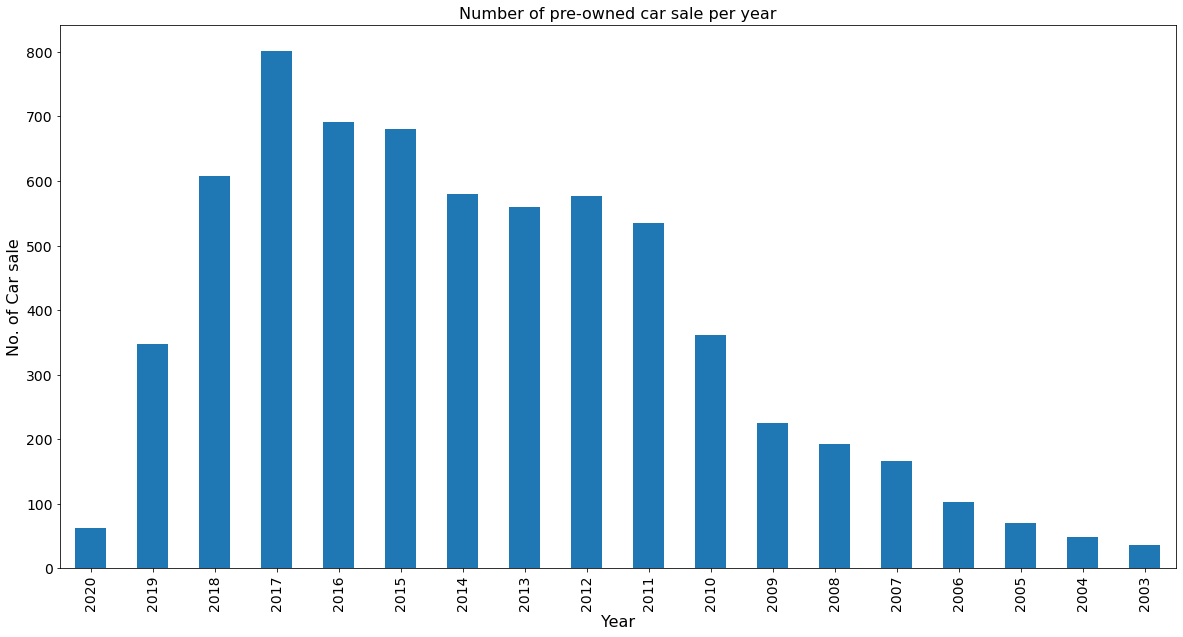

In [26]:
fig = plt.figure(figsize=(20, 10))
ds_car['year'].value_counts().sort_index(ascending=False)[:18].plot.bar()

plt.xlabel(xlabel='Year', fontsize=16)
plt.ylabel(ylabel='No. of Car sale', fontsize=16)
plt.title(label='Number of pre-owned car sale per year', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show

**Observations**:

- In **2017** we had the highest number of sales of pre-owned cars.

- There is an increase in sales from 2003 to 2017.

- There is a dip in sales in the year **2020 and 2019**.
- In 2020 we can conclude because of **pandemic**, hopefully, things will become better in the upcoming year.

**<h3>Question:** Range of CC common in most of cars</h3>

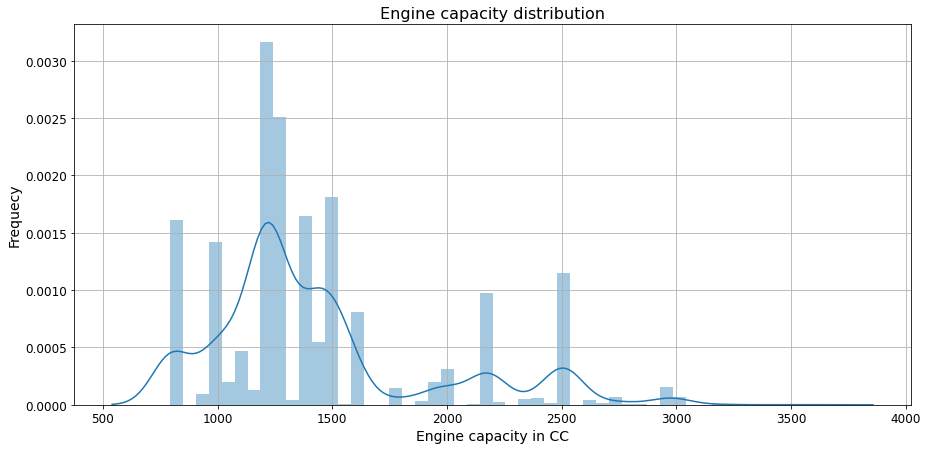

In [140]:
# Initialize figure of size 15 X 7
fig = plt.figure(figsize=(15, 7))

# Plot density distribution of age
sns.distplot(a=ds_car['engine CC'], kde=True)

# Add some cosmetics
plt.title(label='Engine capacity distribution', size=16)
plt.xlabel(xlabel='Engine capacity in CC', size=14)
plt.ylabel(ylabel='Frequecy', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(b=True)

# Display the plot
plt.show()

**Observations**:

- Engine CC with range of **1000 to 1500** are more comman in cars.

- There are few cars of **2000 and 2500** CC in market.

**<h3>Question:** Which fuel type of car have more demand?</h3>

In [158]:
udf = pd.Series(ds_car['fuel'].value_counts()[0:1].append(ds_car['fuel'].value_counts()[2:3]).append(ds_car['fuel'].value_counts()[1:2].append(ds_car['fuel'].value_counts()[-1:])) )

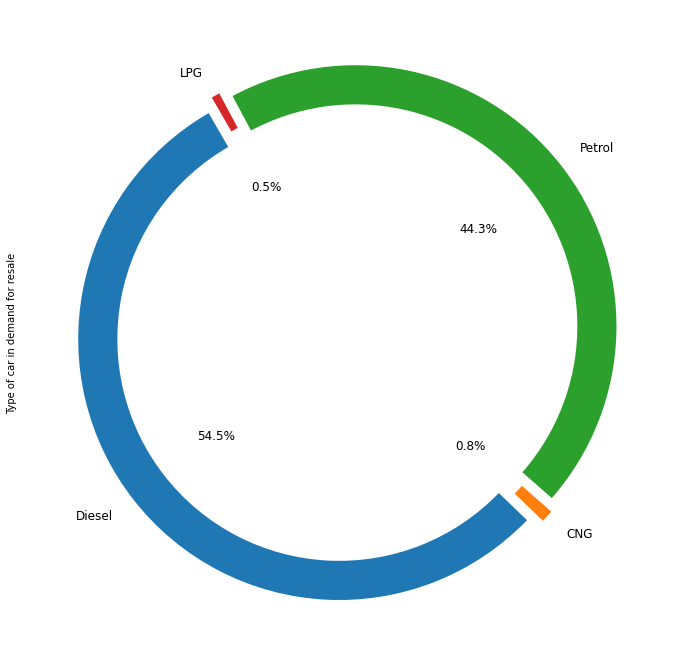

In [159]:
#fig = plt.figure(figsize=(20, 10))
udf.plot(kind='pie',
                                                                autopct='%3.1f%%',
                                                                wedgeprops=dict(width=0.15), 
                                                                explode=np.ones(4)/25,
                                                                figsize=(12, 12),
                                                                fontsize=12, 
                                                                startangle=120,
                                                                label='Type of car in demand for resale')
plt.show()

**Observations**:

- Definitely diesel cars have more demand.

- There is not much difference between diesel and petrol type cars.

- LPG and CNG are much less in demand.

**<h3>Question:** What kind of sellers are there in the market?</h3>

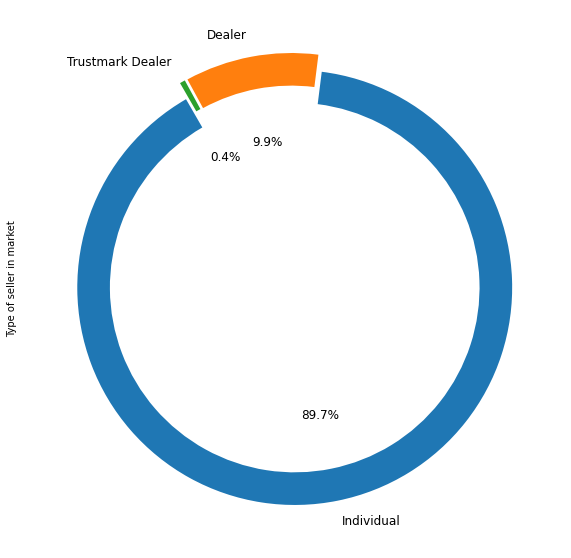

In [164]:
ds_car['seller_type'].value_counts().plot(kind='pie',
                                                                autopct='%3.1f%%',
                                                                wedgeprops=dict(width=0.15), 
                                                                explode=np.ones(3)/25,
                                                                figsize=(10, 10),
                                                                fontsize=12, 
                                                                startangle=120,
                                                                label='Type of seller in market')
plt.show()

**Observations**:

- People prefer selling cars by themself.

- Dealers are in market but very few of them are trusted delaer.

**<h3>Question:** Which brand is more popular in market?</h3>

In [166]:
ds_brand = ds_car['brand'].value_counts()[:10]

In [167]:
data = pd.Series(ds_car['brand'].value_counts()[10:].sum(), index =['Other'])

In [168]:
ds_brand = ds_brand.append(data)

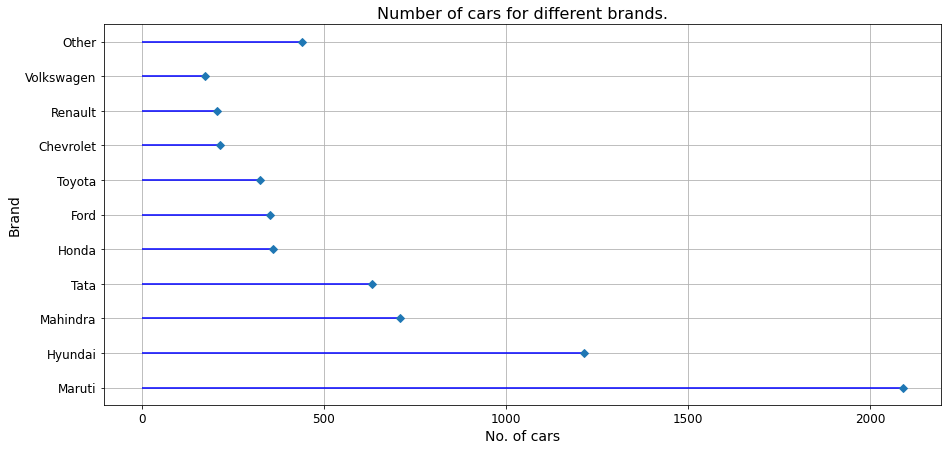

In [214]:
# Create a figure of 15 x 7 inches
plt.figure(figsize=(15,7))

# Plot 
plt.hlines(ds_brand.index,xmin=0,xmax=ds_brand,color='blue')
plt.plot(ds_brand,ds_brand.index , "D")

# Adding some cosmetics
plt.xlabel(xlabel='No. of cars', fontsize=14)
plt.ylabel(ylabel='Brand', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(label='Number of cars for different brands.', fontsize=16)
plt.grid(b=True)

# Display the plot
plt.show()

**Observations**:

- **Maruti, Hyundai, Mahindra and Tata** hold most of the cars in the market.

- Out of which **Maruti** is almost double from second top **Hyundai**.

**<h3>Question:** Top 15 brand have better average and selling price?</h3>

In [109]:
mileage = (ds_car.groupby('brand')['mileage KMPL'].mean().sort_values(ascending=False))/ds_car['mileage KMPL'].max()

In [110]:
sellingPrice = (ds_car.groupby('brand')['selling_price'].mean().sort_values(ascending=False))/ds_car['selling_price'].max()

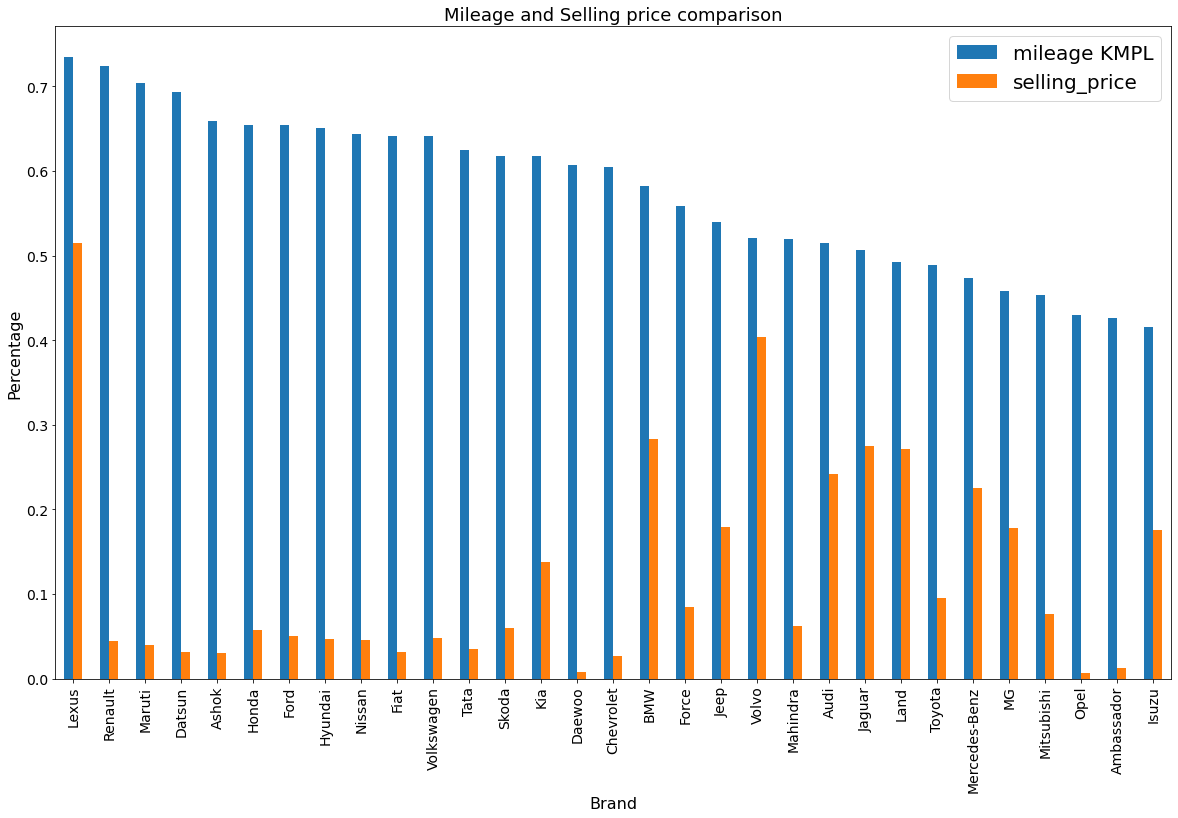

In [114]:
pd.concat([mileage, sellingPrice], axis=1).plot.bar(figsize=(20,12))
plt.title(label='Mileage and Selling price comparison', size=18)
plt.xlabel(xlabel='Brand', size=16)
plt.ylabel(ylabel='Percentage', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(prop={'size': 20})
plt.show()

**Observations**:

- **Lexus, BWM, and Volvo** have better selling price and mileage.
- **Renault, Maruti, Datsun, Honda** have better mileage but not much selling price.
- Mileage of car doen't affect much on selling price of car.
- People and found of better mileage car in less cost.

**<h3>Question:** Which fuel type of car have more better selling price?</h3>

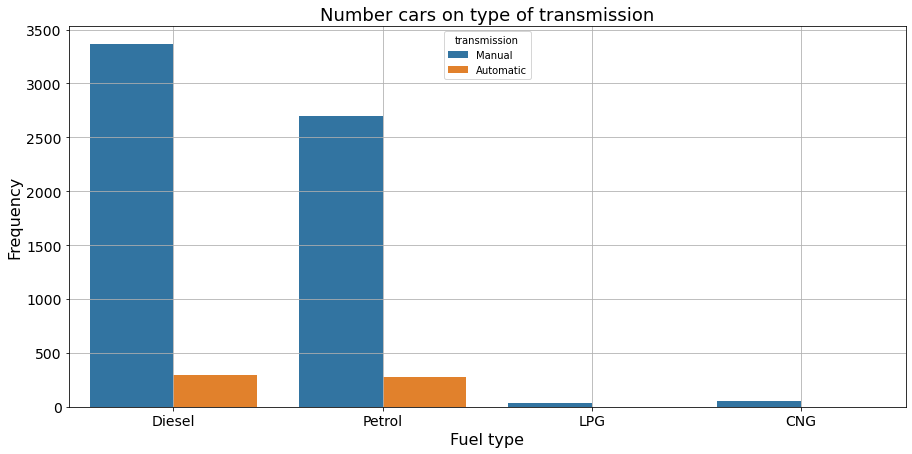

In [57]:
fig = plt.figure(figsize=(15, 7))

# Plot countplot of age concerning treatment
sns.countplot(x='fuel', hue='transmission', data=ds_car)

# Add some cosmetics
plt.title(label='Number cars on type of transmission', size=18)
plt.xlabel(xlabel='Fuel type', size=16)
plt.ylabel(ylabel='Frequency', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(b=True)

# Display the plot
plt.show()

**Observations**:

- Automatic diesel have better resale value.

- Resale of Manual varient is almost similar of all fuel type.

- LPG and CNG are not much papular in Automatic.

**<h3>Question:** Which type of car have better average?</h3>

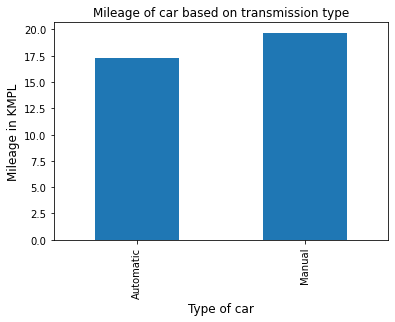

In [83]:
ds_car.groupby(['transmission'])['mileage KMPL'].mean().plot.bar()
plt.ylabel('Mileage in KMPL', fontSize = 12)
plt.xlabel('Type of car', fontSize = 12)
plt.title('Mileage of car based on transmission type')
plt.show()

**Observations**:

- Manual cars have better average.

**<h3>Question:** Does value of car descrease based on how many people have sold?</h3>

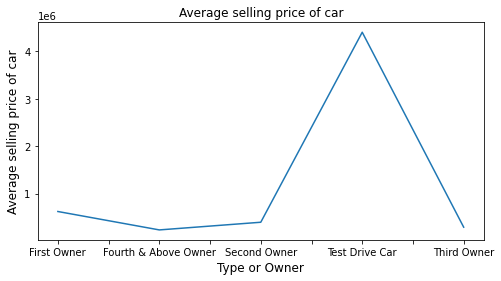

In [84]:
fig = plt.figure(figsize=(8, 4))
ds_car.groupby(['owner'])['selling_price'].mean().plot.line()
plt.ylabel('Average selling price of car', fontSize = 12)
plt.xlabel('Type or Owner', fontSize = 12)
plt.title('Average selling price of car')
plt.show()

**Observations**:

- There is huge gap between test drive car and resale after that.
- Price decrease little but my very little margine after first owner.

**<h3>Question:** Does KM driven have impact of car price?</h3>

<Figure size 864x576 with 0 Axes>

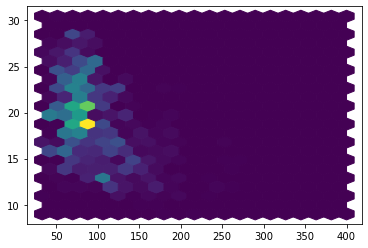

In [102]:
# make data: correlated + noise


t = ds_car['power BHP']
s = ds_car['mileage KMPL']


#plt.plot.scatter(x= t, y= s)
fig = plt.figure(figsize=(12, 8))

fig, ax = plt.subplots()

ax.hexbin(x= t, y= s, gridsize=20)

"""fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()"""

plt.show()

**<h3>Question:** Which fuel type have more demand over the year?</h3>

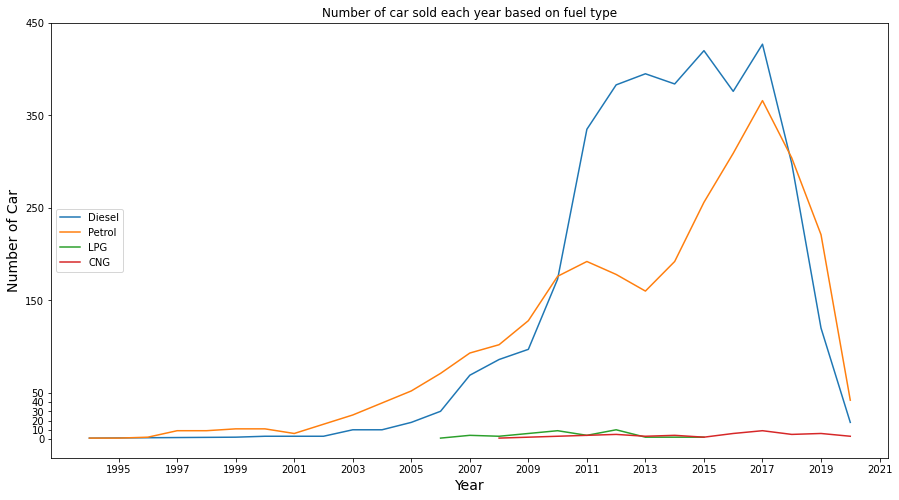

In [87]:
fig = plt.figure(figsize=(15, 8))
ds_car[ds_car['fuel'] == 'Diesel']['year'].value_counts().sort_index(ascending=False).plot.line(label = "Diesel")
ds_car[ds_car['fuel'] == 'Petrol']['year'].value_counts().sort_index(ascending=False).plot.line(label = "Petrol")
ds_car[ds_car['fuel'] == 'LPG']['year'].value_counts().sort_index(ascending=False).plot.line(label = "LPG")
ds_car[ds_car['fuel'] == 'CNG']['year'].value_counts().sort_index(ascending=False).plot.line(label = "CNG")

plt.xticks(np.arange(1995, 2022, 2))
plt.yticks(np.append(np.arange(0, 50, 10),np.arange(50, 451, 100)))
plt.xlabel('Year', fontSize = 14)
plt.ylabel('Number of Car', fontSize = 14)
plt.title('Number of car sold each year based on fuel type')
plt.legend(loc = 'center left')
plt.show()

**Observations**:

- An average diesel cars have **high demands** over the years.
- Petrol cars had a picked demand in the years **2016, 2017**.
- All cars demand to decrease drastically in **2020**.
- LPG cars started their little popularity in **2006**, but almost ended in 2015.
- CNG demand as almost the same every year since **2008** that is very less as compared to diesel and petrol.

**<h3>Question:** Which fuel type have more demand amomg owners?</h3>

<Figure size 1080x576 with 0 Axes>

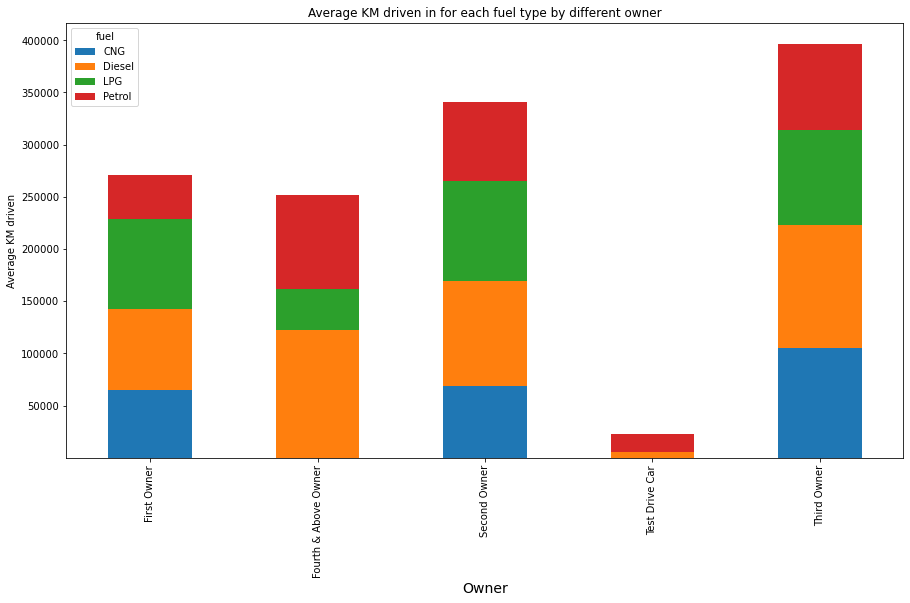

In [88]:
fig = plt.figure(figsize=(15, 8))

visualdata = ds_car.groupby(['owner','fuel'])['km_driven'].mean().unstack('fuel').fillna(0)
visualdata.plot(kind='bar', stacked=True, figsize = (15,8))
plt.xlabel('Owner',fontSize = 14)
plt.ylabel('Average KM driven')
plt.title('Average KM driven in for each fuel type by different owner')
plt.show()

**Observations**:
- Test drive are mostly done on petrol varient
- Diesel car are used most out of all varient

**<h3>Question:** Which brand have most varienty of cars in market?</h3>

In [136]:
ds_sub_top_brand = ds_car.groupby(by='brand')['sub_brand'].nunique().sort_values(ascending=False)[0:11]

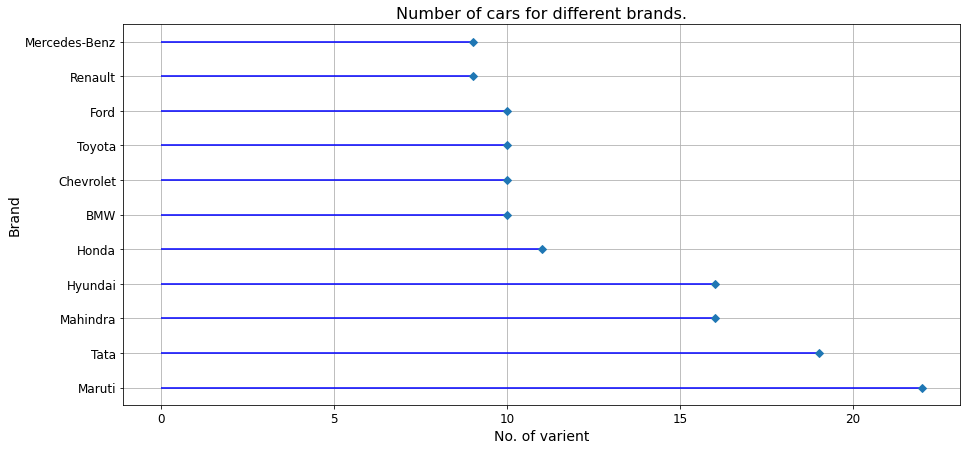

In [138]:
# Create a figure of 15 x 7 inches
plt.figure(figsize=(15,7))

# Plot 
plt.hlines(ds_sub_top_brand.index,xmin=0,xmax=ds_sub_top_brand,color='blue')
plt.plot(ds_sub_top_brand,ds_sub_top_brand.index , "D")

# Adding some cosmetics
plt.xlabel(xlabel='No. of varient', fontsize=14)
plt.ylabel(ylabel='Brand', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(label='Number of cars for different brands.', fontsize=16)
plt.grid(b=True)

# Display the plot
plt.show()

**Observations**:
- **Maruti, Tata, Mahindra, Hundai** have most number of varient in market. 

<a name = Section9></a>

---
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- **Diesel** cars are more popular in the market.

- **2011** to **2018** may people opted for pre-owned cars

- **Maruti, Hyundai, Mahindra and Tata** are top-selling cars.

- Most cars of range of **1000** to **1500** CC

- **Automatic** transmission cards are getting popularity, instead of little advantage in mileage in **manual** cars.

<a name = Section92></a>
### **9.2 Actionable Insights**

- Awareness programs should be conducted about **CNG** and **LPG** cars to make cars environment friendly.

- As automatic cars are getting popular day by day we should also bring **CNG** and **LPG** variants soon.

- Promote trusted dealers to come to business so that the best quality and trusted pre-owned cars are sold out.

- **Ashok, Datsum, Renault and Lexus** have better average they should work more on advertisement of their brand.    

- Because of Covid and WFH policies car sales is reduced, the government should reduce taxes and the company should reduce the cost of the car to gain market again.

- Top-selling brands like **Maruti, Hyundai, Mahindra, Tata, Honda** should recommend and provide discounts on LPG and CNG cars.

- Empower your customers to actively share their details, **make your customers part of the process**.

- Encourage them to share their **data** with you through **conversations**, **surveys**, and other **research methods**.

- Doing so not only help you get to know them better but also **builds trust**.

- It would be important to **talk with the e-commerce team to understand the business, customers, strategic and tactical objectives**.